<a href="https://colab.research.google.com/github/pokejishnu/CollabNotebooks/blob/master/Recommendation_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)
mainpath="./drive/My Drive/Recommendation_Engine/"


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
import numpy as np 
import pandas as pd
# Load packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

Populating the interactive namespace from numpy and matplotlib


In [3]:
train=pd.read_csv(mainpath+"train_ver2.csv",
                           dtype={"sexo":str, "ind_nuevo":str, 
                                  "ult_fec_cli_1t":str, 
                                  "indext":str}) 

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
train.shape

(13647309, 48)

In [5]:
train.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [0]:
unique_ids   = pd.Series(train["ncodpers"].unique())
unique_id    = unique_ids.sample(n=100000)
df           = train[train.ncodpers.isin(unique_id)]

In [7]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.20.2)


In [8]:
df.shape

(1425729, 48)

***Data Cleaning***

In [9]:
df["ncodpers"].count()

1425729

In [10]:
df["age"] = pd.to_numeric(df["age"], errors = 'coerce')
df["antiguedad"]   = pd.to_numeric(df["antiguedad"], errors="coerce") 
df["indrel_1mes"]   = pd.to_numeric(df["indrel_1mes"], errors="coerce") 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [11]:
df1 = train1.copy()
# First extract the target variable which is our gross_income
Y = df1.gross_income.values
# Drop gross_income from the dataframe and create a matrix out of the data
X = df1.drop(['gross_income'], axis=1)
#X = df1.as_matrix()
# Store the column/feature names into a list "colnames"
int_cols = [key for key in dict(X.dtypes) if dict(X.dtypes)[key] in ['float64', 'int64']]

NameError: ignored

**Na value distribution across columns**

In [13]:
(df.isnull().sum()/len(df))*100

fecha_dato                0.000000
ncodpers                  0.000000
ind_empleado              0.203264
pais_residencia           0.203264
sexo                      0.203264
age                       0.203264
fecha_alta                0.203264
ind_nuevo                 0.203264
antiguedad                0.203264
indrel                    0.203264
ult_fec_cli_1t           99.815463
indrel_1mes               1.102243
tiprel_1mes               1.094107
indresi                   0.203264
indext                    0.203264
conyuemp                 99.989269
canal_entrada             1.358253
indfall                   0.203264
tipodom                   0.203264
cod_prov                  0.690524
nomprov                   0.690524
ind_actividad_cliente     0.203264
renta                    20.458727
segmento                  1.382731
ind_ahor_fin_ult1         0.000000
ind_aval_fin_ult1         0.000000
ind_cco_fin_ult1          0.000000
ind_cder_fin_ult1         0.000000
ind_cno_fin_ult1    

**Drop columns with 99% NA**

In [0]:
df = df.drop(["ult_fec_cli_1t", "conyuemp"], axis=1) 

**Impute Gross Income with province wise median income**

In [0]:
grouped        = df.groupby("nomprov").agg({"renta":lambda x: x.median(skipna=True)}).reset_index()
new_incomes    = pd.merge(df,grouped,how="inner",on="nomprov").loc[:, ["nomprov","renta_y"]]
new_incomes    = new_incomes.rename(columns={"renta_y":"renta"}).sort_values("renta").sort_values("nomprov")
df.sort_values("nomprov",inplace=True)
df             = df.reset_index()
new_incomes    = new_incomes.reset_index()

df.loc[df.renta.isnull(),"renta"] = new_incomes.loc[df.renta.isnull(),"renta"].reset_index()
df.loc[df.renta.isnull(),"renta"] = df.loc[df.renta.notnull(),"renta"].median()
df.sort_values(by="fecha_dato",inplace=True)

**Drop all other NA **

In [0]:
df = df.dropna(axis=0)

**Seniorty less than 0 - Drop No - Set 0**

In [0]:
df[df["antiguedad"]<0] = 0

**Total Products/ customer/ mnth **

In [0]:
df["tot_products"] = df.loc[:,"ind_ahor_fin_ult1":"ind_recibo_ult1"].sum(axis=1)
df["tot_products"]   = pd.to_numeric(df["tot_products"], errors="coerce")

**Summarise of province**

In [19]:
df['pais_residencia'].describe()

count     1399041
unique          2
top            ES
freq      1399025
Name: pais_residencia, dtype: object

**Select only those in ES**

In [0]:
df = df.loc[lambda df: df.pais_residencia == "ES", :]

**Employee Type Describe**

In [23]:
df['ind_empleado'].value_counts()

N    1398023
Name: ind_empleado, dtype: int64

**Keep only those where customer type == N**

In [0]:
df = df.loc[lambda df: df.ind_empleado == "N", :]

**Age Distribution**

Text(0, 0.5, 'Number of customers')

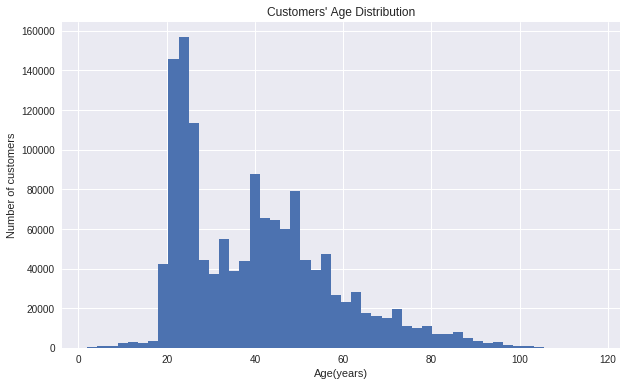

In [25]:
df['age'].hist(bins=50)
plt.title("Customers' Age Distribution")
plt.xlabel("Age(years)")
plt.ylabel("Number of customers") 

**Channel Chosen Summary Data**

In [26]:
df['canal_entrada'].value_counts().head(15)

KHE    425895
KAT    338787
KFC    319547
KHQ     61684
KFA     41363
KHK     24880
KHM     18638
KHN     12526
KHD     11892
KAS      9260
RED      8275
KAG      7008
KAA      6875
KAY      6766
KAB      6215
Name: canal_entrada, dtype: int64

**Channel Chosen Summary Plot**

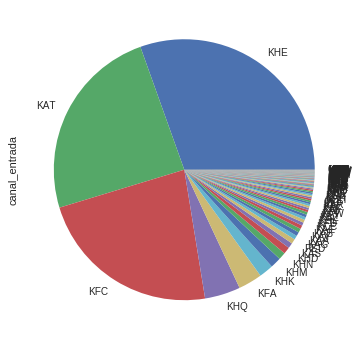

In [27]:
df["canal_entrada"].value_counts().plot(x=None, y=None, kind='pie')

**Number of products by activity index and sex **

In [0]:
df_a = df.loc[:, ['sexo', 'ind_actividad_cliente']].join(df.loc[:, "ind_ahor_fin_ult1": "ind_recibo_ult1"])
df_a = df_a.groupby(['sexo', 'ind_actividad_cliente']).sum()
df_a = df_a.T

In [30]:
df_a.head()

sexo                          H                   V          
ind_actividad_cliente       0.0       1.0       0.0       1.0
ind_ahor_fin_ult1           0.0       0.0      35.0     100.0
ind_aval_fin_ult1           0.0       6.0       0.0      32.0
ind_cco_fin_ult1       225070.0  204125.0  216185.0  271467.0
ind_cder_fin_ult1          17.0     139.0      17.0     420.0
ind_cno_fin_ult1          640.0   46155.0     859.0   65296.0

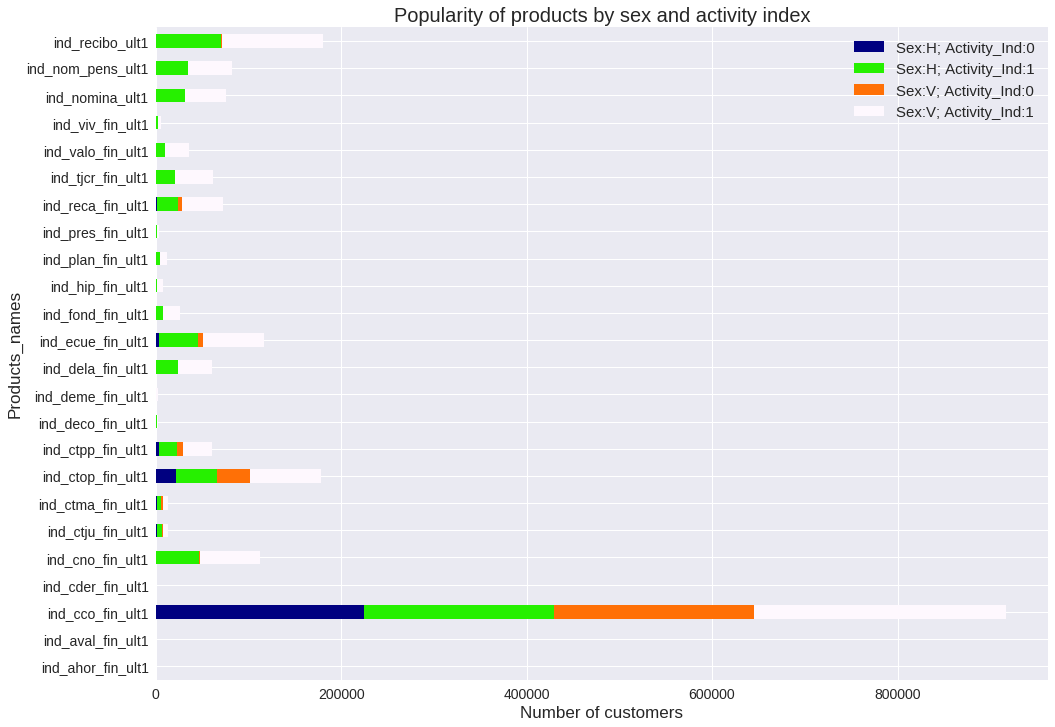

In [31]:
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='gist_ncar')
plt.title('Popularity of products by sex and activity index', fontsize=20) 
plt.xlabel('Number of customers', fontsize=17) 
plt.ylabel('Products_names', fontsize=17) 
plt.legend(["Sex:H; Activity_Ind:0", "Sex:H; Activity_Ind:1", "Sex:V; Activity_Ind:0", 
            "Sex:V; Activity_Ind:1"], prop={'size':15})

In [0]:
# excluding the dominant product 
exclude = ['ind_cco_fin_ult1']
df_a = df_a.T
df_a = df_a.drop(exclude, axis=1).T

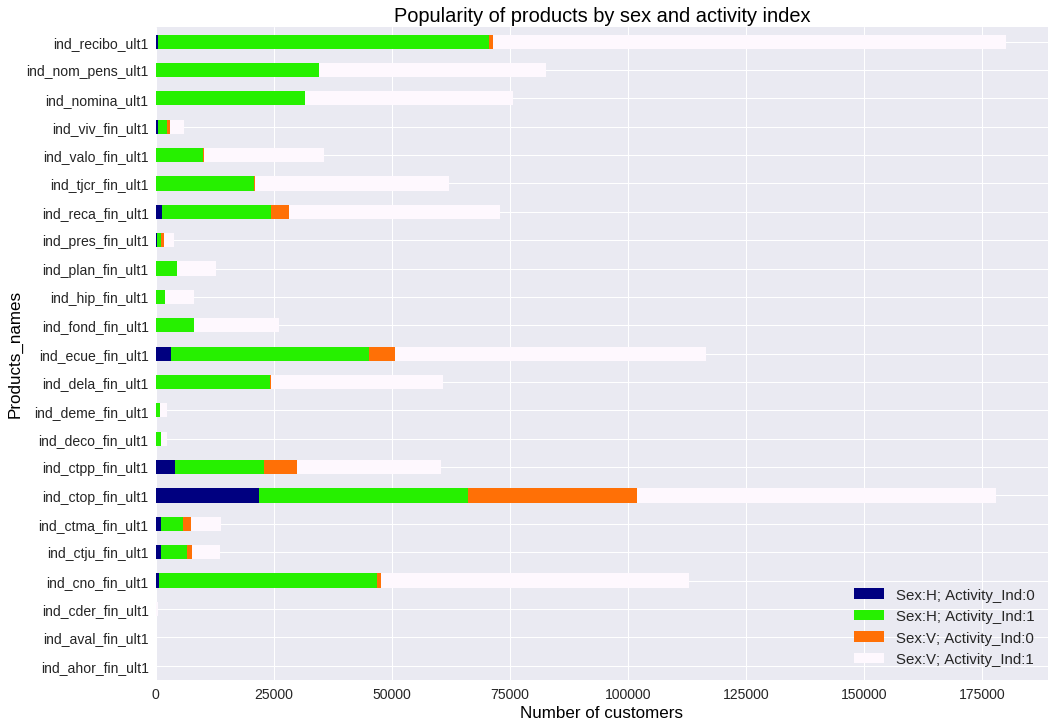

In [33]:
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='gist_ncar')
plt.title('Popularity of products by sex and activity index', fontsize=20, color='black') 
plt.xlabel('Number of customers', fontsize=17, color='black') 
plt.ylabel('Products_names', fontsize=17, color='black') 
plt.legend(["Sex:H; Activity_Ind:0", "Sex:H; Activity_Ind:1", "Sex:V; Activity_Ind:0", 
            "Sex:V; Activity_Ind:1"], prop={'size':15}) 

**Total no of products per customer **

In [35]:
df["tot_products"].value_counts()

1.0     736476
0.0     260568
2.0     197203
3.0      79174
4.0      45259
5.0      30481
6.0      21230
7.0      14138
8.0       8101
9.0       3430
10.0      1234
11.0       604
12.0        83
13.0        42
Name: tot_products, dtype: int64

**Total products across age**

In [0]:
df_a = df.groupby(['age'])['tot_products'].agg('sum')

In [37]:
df_a.sort_values(ascending=False).head(20)

age
23.0    75112.0
24.0    73127.0
22.0    68419.0
45.0    65719.0
44.0    64333.0
43.0    64113.0
42.0    60650.0
46.0    60352.0
41.0    60214.0
48.0    59091.0
21.0    58784.0
47.0    58087.0
40.0    52988.0
49.0    51811.0
25.0    48607.0
50.0    48318.0
51.0    47304.0
39.0    44407.0
52.0    43292.0
53.0    39796.0
Name: tot_products, dtype: float64

Text(0, 0.5, 'Number of products')

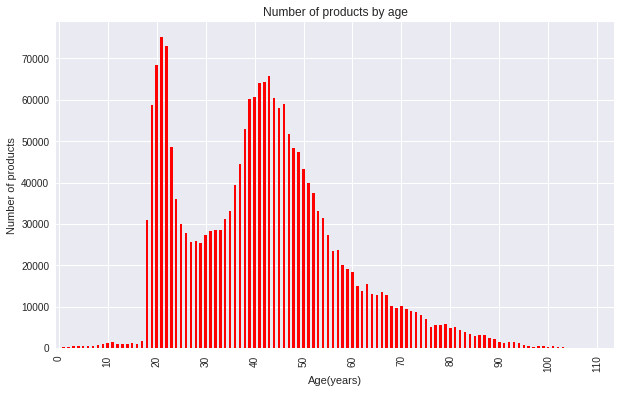

In [38]:
# Number of products by age 
df_a.plot(kind='bar', colormap='autumn', legend=None) 
plt.xticks(np.arange(0, 120, 10), [str(x) for x in np.arange(0, 120, 10)])
plt.title('Number of products by age') 
plt.xlabel('Age(years)') 
plt.ylabel('Number of products')

In [39]:
df_a = df.groupby(['segmento'])['tot_products'].agg('sum') 
df_a

segmento
01 - TOP               239719.0
02 - PARTICULARES     1289732.0
03 - UNIVERSITARIO     514944.0
Name: tot_products, dtype: float64

**Number of products by new customer index¶**

In [40]:
df_a = df.groupby(['ind_nuevo'])['tot_products'].agg('count') 
df_a

ind_nuevo
 0    1327988
 1      70035
Name: tot_products, dtype: int64

**Number of products by customer type at the beginning of the month**

In [41]:
df_a = df.groupby(['indrel'])['tot_products'].agg('count') 
df_a

indrel
1.0     1395970
99.0       2053
Name: tot_products, dtype: int64

**Number of products by customer's birth country in relation to the bank country**

In [42]:
df_a = df.groupby(['indext'])['tot_products'].agg('count') 
df_a

indext
N    1336368
S      61655
Name: tot_products, dtype: int64

In [0]:
df_a = (df.groupby(pd.cut(df['renta'], [0,60000,120000,180000,240000, pd.np.inf], right=False))
                     .sum())

In [46]:
df_a['tot_products']

renta
[0.0, 60000.0)           259878.0
[60000.0, 120000.0)     1008637.0
[120000.0, 180000.0)     405890.0
[180000.0, 240000.0)     181234.0
[240000.0, inf)          188756.0
Name: tot_products, dtype: float64

In [0]:
# Let's drop the columns which are unnecessary for this step
df_a = df_a.loc[:, "ind_ahor_fin_ult1": "ind_recibo_ult1"]
df_a = df_a.T

In [48]:
df_a.head(10)

renta,"[0.0, 60000.0)","[60000.0, 120000.0)","[120000.0, 180000.0)","[180000.0, 240000.0)","[240000.0, inf)"
ind_ahor_fin_ult1,17.0,34.0,50.0,17.0,17.0
ind_aval_fin_ult1,6.0,0.0,15.0,17.0,0.0
ind_cco_fin_ult1,143590.0,490941.0,156912.0,61583.0,63821.0
ind_cder_fin_ult1,67.0,305.0,188.0,17.0,16.0
ind_cno_fin_ult1,13022.0,53424.0,24523.0,11029.0,10952.0
ind_ctju_fin_ult1,1113.0,5989.0,3670.0,1608.0,1282.0
ind_ctma_fin_ult1,1548.0,7317.0,2739.0,1096.0,1068.0
ind_ctop_fin_ult1,17127.0,81184.0,39584.0,19337.0,20745.0
ind_ctpp_fin_ult1,5366.0,27829.0,13082.0,7073.0,7155.0
ind_deco_fin_ult1,277.0,1386.0,435.0,186.0,154.0


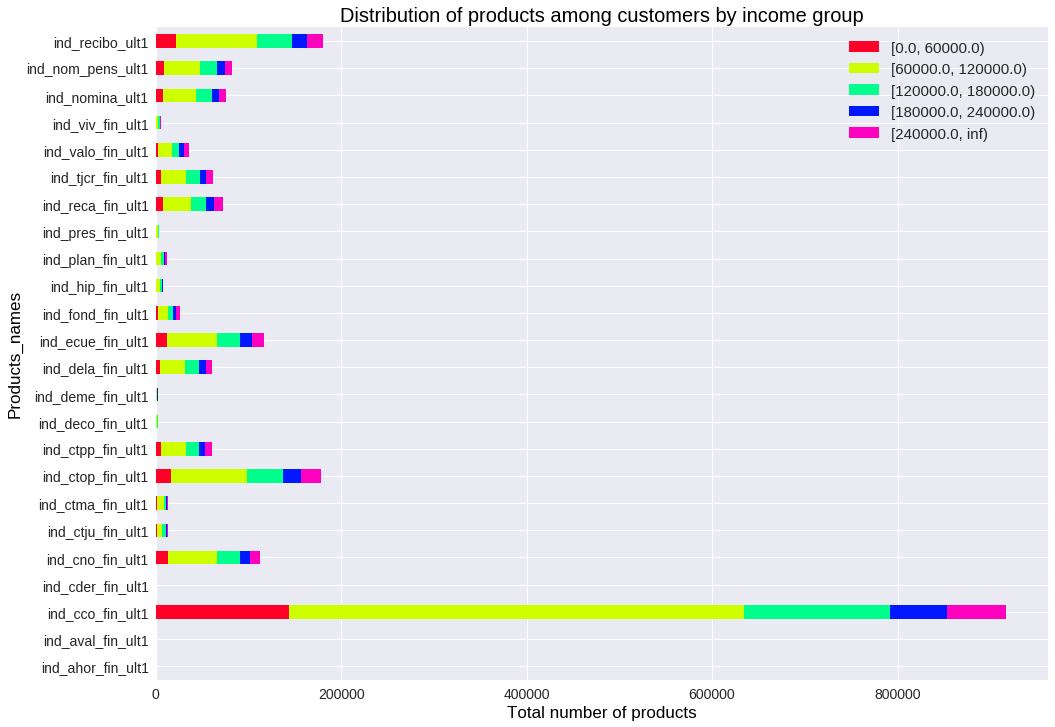

In [49]:
# Plot of product share for each income group
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='gist_rainbow')
plt.title('Distribution of products among customers by income group', fontsize=20, color='black') 
plt.xlabel('Total number of products', fontsize=17, color='black') 
plt.ylabel('Products_names', fontsize=17, color='black') 
plt.legend(prop={'size':15}, loc=1)

In [0]:
# exclude the dominant product "ind_cco_fin_ult1"
exclude = ['ind_cco_fin_ult1']
df_a = df_a.T
df_a = df_a.drop(exclude, axis=1).T

In [51]:
df_a.head()

renta,"[0.0, 60000.0)","[60000.0, 120000.0)","[120000.0, 180000.0)","[180000.0, 240000.0)","[240000.0, inf)"
ind_ahor_fin_ult1,17.0,34.0,50.0,17.0,17.0
ind_aval_fin_ult1,6.0,0.0,15.0,17.0,0.0
ind_cder_fin_ult1,67.0,305.0,188.0,17.0,16.0
ind_cno_fin_ult1,13022.0,53424.0,24523.0,11029.0,10952.0
ind_ctju_fin_ult1,1113.0,5989.0,3670.0,1608.0,1282.0


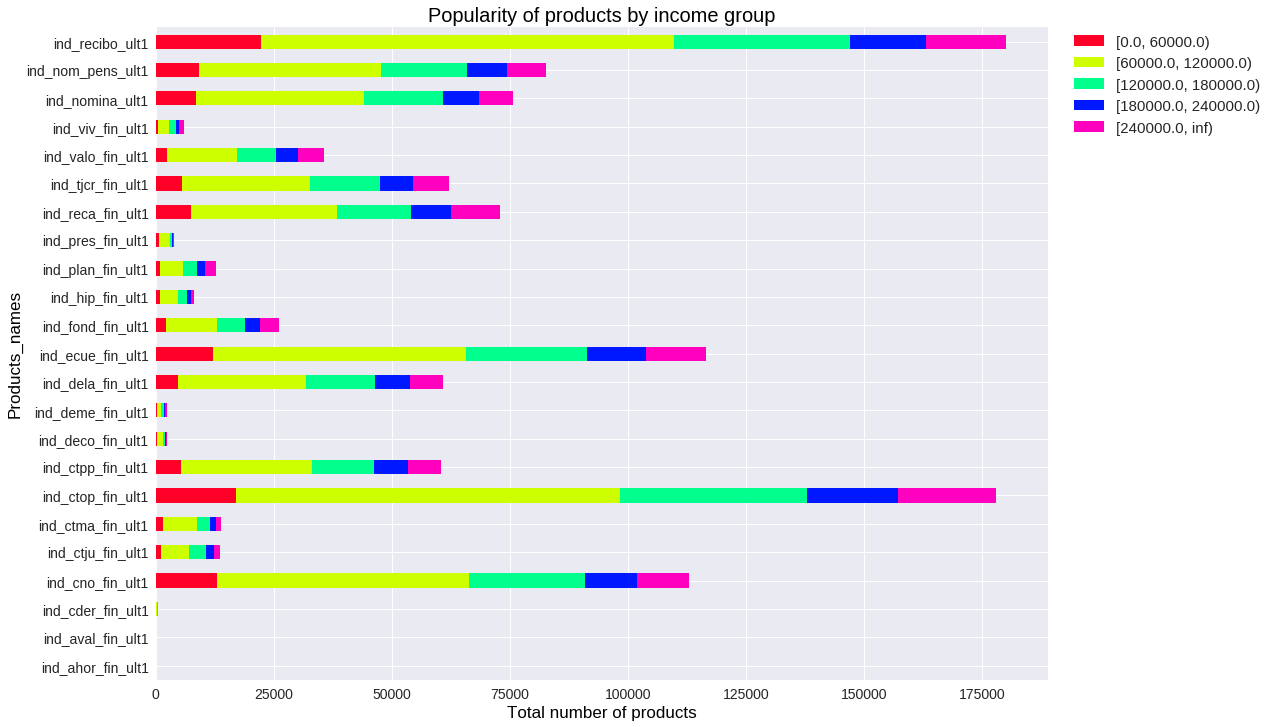

In [52]:
# Plot of product share for each income group; excluding the dominant product 
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='gist_rainbow')
plt.title('Popularity of products by income group', fontsize=20, color='black') 
plt.xlabel('Total number of products', fontsize=17, color='black') 
plt.ylabel('Products_names', fontsize=17, color='black') 
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.1, prop={'size':15})

**Popularity of products by Age**

In [0]:
# Let's create age groups
df_a = (df.groupby(pd.cut(df['age'], [0,20,40,60,80,100, pd.np.inf], right=False))
                     .sum())

In [0]:
df_a = df_a.loc[:, "ind_ahor_fin_ult1": "ind_recibo_ult1"]
df_a = df_a.T

In [56]:
df_a.head(24)

age,"[0.0, 20.0)","[20.0, 40.0)","[40.0, 60.0)","[60.0, 80.0)","[80.0, 100.0)","[100.0, inf)"
ind_ahor_fin_ult1,0.0,0.0,135.0,0.0,0.0,0.0
ind_aval_fin_ult1,0.0,6.0,32.0,0.0,0.0,0.0
ind_cco_fin_ult1,638.0,531169.0,279614.0,83829.0,20784.0,813.0
ind_cder_fin_ult1,0.0,60.0,373.0,143.0,17.0,0.0
ind_cno_fin_ult1,0.0,38226.0,63606.0,9832.0,1269.0,17.0
ind_ctju_fin_ult1,13550.0,112.0,0.0,0.0,0.0,0.0
ind_ctma_fin_ult1,0.0,4565.0,6908.0,1897.0,398.0,0.0
ind_ctop_fin_ult1,0.0,17575.0,107305.0,38011.0,14313.0,773.0
ind_ctpp_fin_ult1,0.0,9998.0,39592.0,8925.0,1885.0,105.0
ind_deco_fin_ult1,0.0,668.0,1289.0,410.0,71.0,0.0


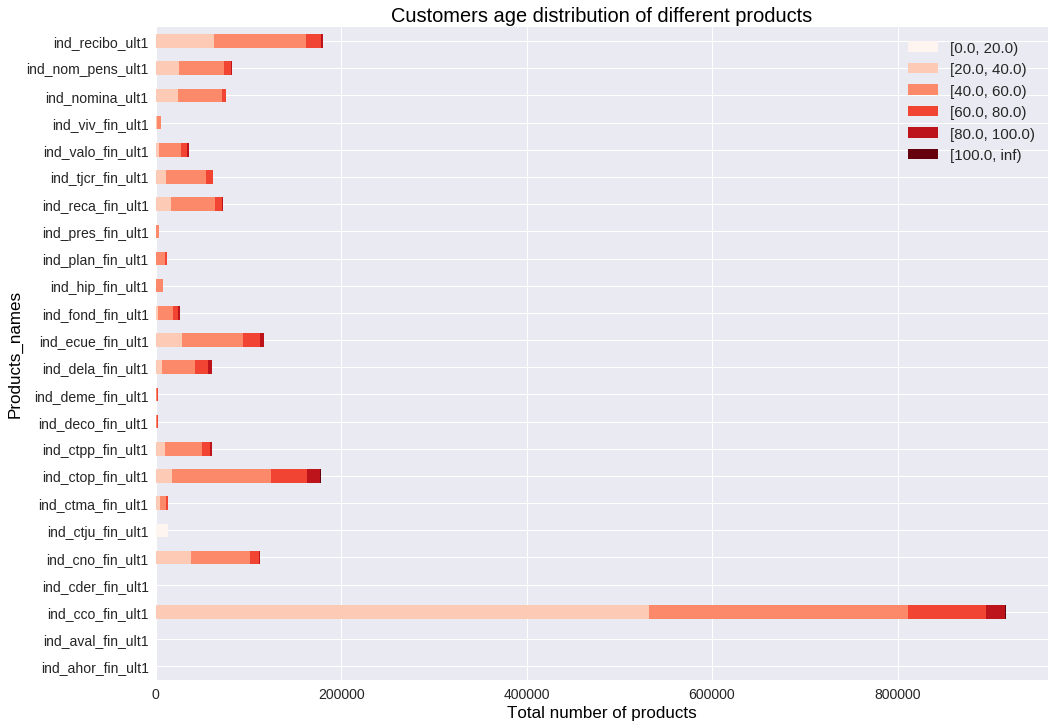

In [57]:
# Plot of customers' age distibution of each product 
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='Reds')
plt.title('Customers age distribution of different products', fontsize=20, color='black') 
plt.xlabel('Total number of products', fontsize=17, color='black') 
plt.ylabel('Products_names', fontsize=17, color='black') 
plt.legend(prop={'size':15}, loc=1)

Exclude the most dominant

In [0]:
# exclude the dominant product "ind_cco_fin_ult1"
exclude = ['ind_cco_fin_ult1']
df_a = df_a.T
df_a = df_a.drop(exclude, axis=1).T

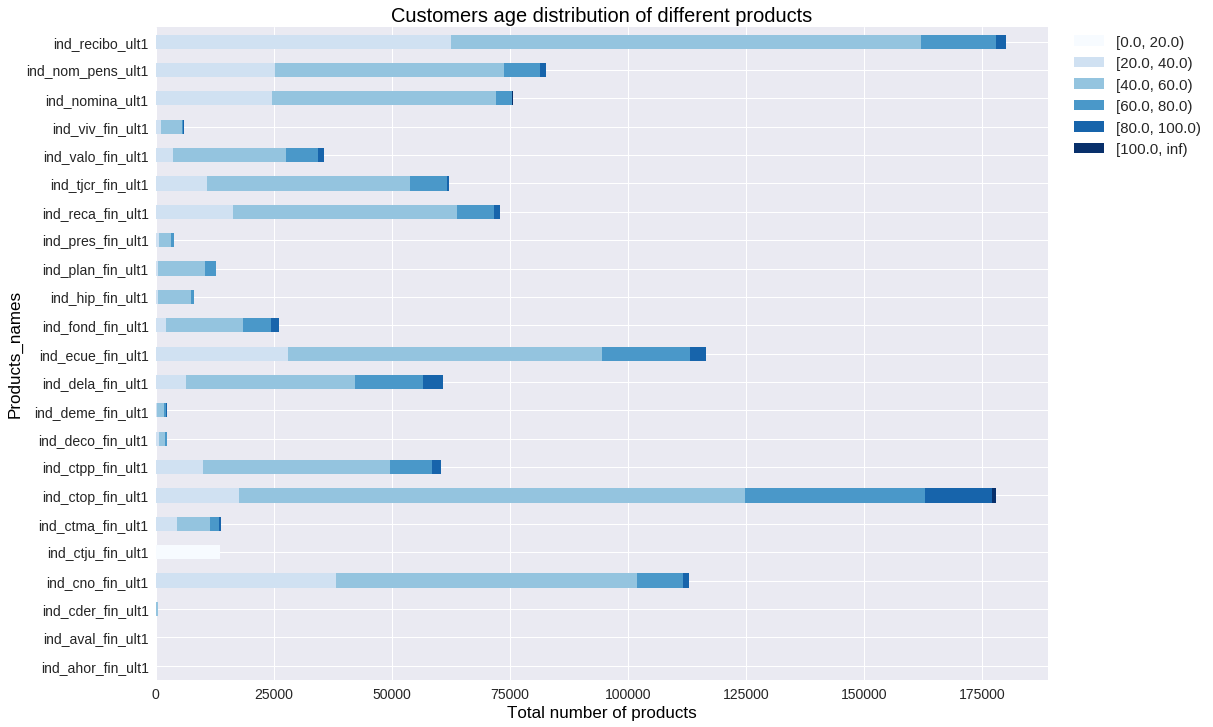

In [59]:
# Plot of customers' age distibution of each product (excluding the dominant product) 
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='Blues')
plt.title('Customers age distribution of different products', fontsize=20, color='black') 
plt.xlabel('Total number of products', fontsize=17, color='black') 
plt.ylabel('Products_names', fontsize=17, color='black') 
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.1, prop={'size':15})

In [60]:
df["canal_entrada"].value_counts().head(10)

KHE    425895
KAT    338787
KFC    319547
KHQ     61684
KFA     41363
KHK     24880
KHM     18638
KHN     12526
KHD     11892
KAS      9260
Name: canal_entrada, dtype: int64

Since 6 out of 160 channels account for about 87.11% of the total number of customers attraction and to be able to visualze, we are going to exclude any channel has a contribution less than 1%

In [0]:
# Let's extract the necessary columns for this step
df_a = df.loc[:, ['canal_entrada']].join(df.loc[:, 'ind_ahor_fin_ult1':'ind_recibo_ult1'])

In [0]:
# Let's subset the data to keep only the records from the five major channels
subset = ["KHE", "KAT", "KFC", "KFA", "KHK"]
df_a = df_a.loc[df_a['canal_entrada'].isin(subset)]

In [0]:
df_a = df_a.groupby("canal_entrada").agg("sum")
df_a = df_a.T

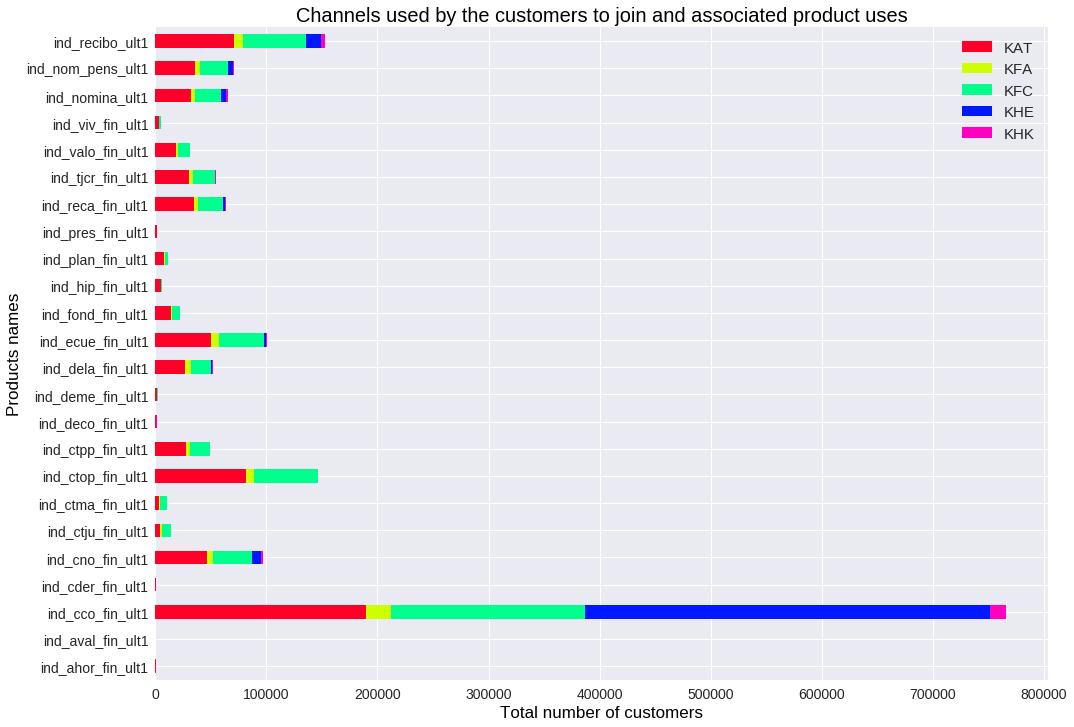

In [65]:
# Channels used by the customer to join and the purchased products
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='gist_rainbow')
plt.title('Channels used by the customers to join and associated product uses', fontsize=20, color='black') 
plt.xlabel('Total number of customers', fontsize=17, color='black') 
plt.ylabel('Products names', fontsize=17, color='black') 
plt.legend(prop={'size':15})

In [0]:
# exclude the dominant product "ind_cco_fin_ult1"
exclude = ['ind_cco_fin_ult1']
df_a = df_a.T
df_a = df_a.drop(exclude, axis=1).T

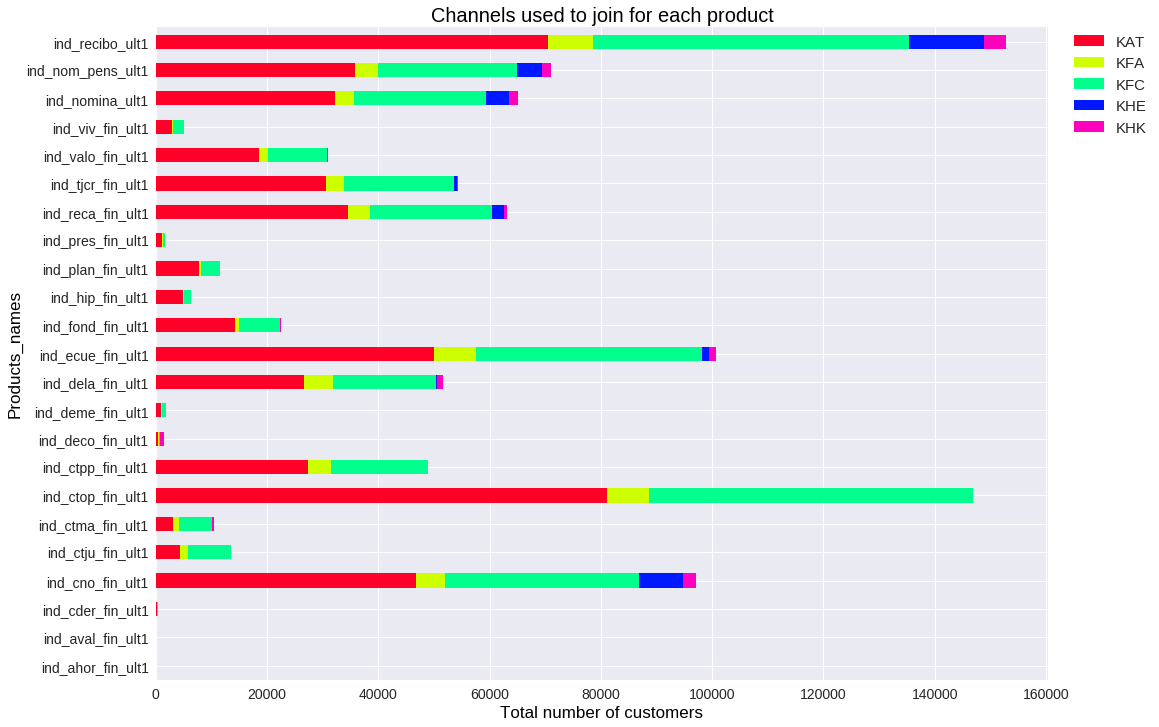

In [67]:
# Channels share distribution of each product, excluding the dominant product
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='gist_rainbow')
plt.title('Channels used to join for each product', fontsize=20, color='black') 
plt.xlabel('Total number of customers', fontsize=17, color='black') 
plt.ylabel('Products_names', fontsize=17, color='black') 
plt.legend(["KAT", "KFA", "KFC", "KHE", "KHK"], prop={'size':15}, loc=1) 
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.1, prop={'size':15})